In [58]:
from PIL import Image, ImageDraw
from IPython.display import display
from Pylette import extract_colors

import os
import webcolors

In [62]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

requested_colour = (119, 172, 152)


Actual colour name: None , closest colour name: cadetblue


In [70]:
def display_color_palette(image_path, square_size=100):
    # Load in clothing image
    clothing_img = Image.open(image_path).convert("RGB")
    clothing_img_resized = clothing_img.resize((square_size, square_size))

    # Extract most common colors for palette values
    palette_size = 10
    palette = extract_colors(image=image_path, palette_size=palette_size, resize=True)
    colors = [color.rgb for color in palette]

    # Calculate the dimensions of the image based on the number of colors
    num_colors = len(colors)
    
    palette_width = square_size * num_colors
    palette_height = square_size
    
    # Create a new image with a white background
    palette_img = Image.new("RGB", (palette_width, palette_height), color="white")
    draw = ImageDraw.Draw(palette_img)
    
    # Draw squares for each color
    color_names = []
    for i, color in enumerate(colors):
        x0 = i * square_size
        y0 = 0
        x1 = x0 + square_size
        y1 = y0 + square_size

        # Get color names
        _, color_name = get_colour_name(color)
        color_names.append(color_name)

        draw.rectangle([x0, y0, x1, y1], fill=tuple(color))
    
    # Concatenate the images horizontally
    combined_img = Image.new("RGB", (square_size * (num_colors + 1), palette_img.height))
    combined_img.paste(clothing_img_resized, (0, 0))
    combined_img.paste(palette_img, (clothing_img_resized.width, 0))
    
    # Display the combined image
    display(combined_img)

    return color_names

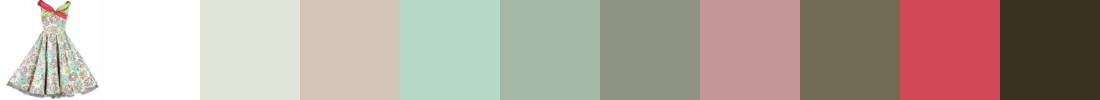

['white', 'gainsboro', 'silver', 'silver', 'darkgray', 'gray', 'rosybrown', 'dimgray', 'indianred', 'darkslategray']


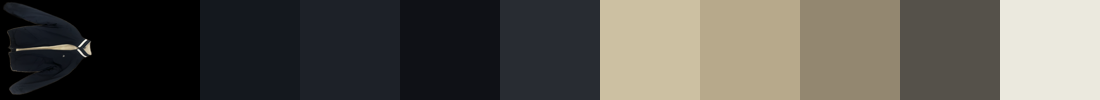

['black', 'black', 'black', 'black', 'darkslategray', 'tan', 'rosybrown', 'gray', 'darkolivegreen', 'beige']


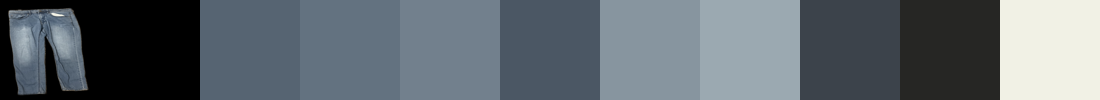

['black', 'dimgray', 'slategray', 'slategray', 'dimgray', 'lightslategray', 'darkgray', 'darkslategray', 'darkslategray', 'linen']


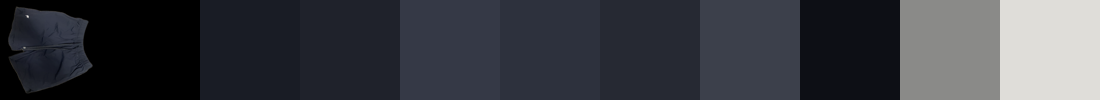

['black', 'black', 'darkslategray', 'darkslategray', 'darkslategray', 'darkslategray', 'darkslategray', 'black', 'gray', 'gainsboro']


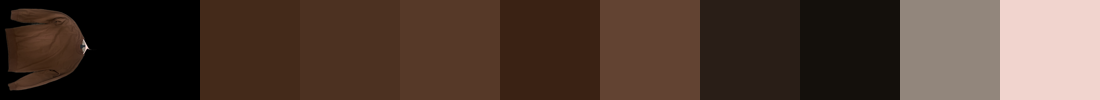

['black', 'darkslategray', 'darkolivegreen', 'darkolivegreen', 'black', 'darkolivegreen', 'black', 'black', 'gray', 'bisque']


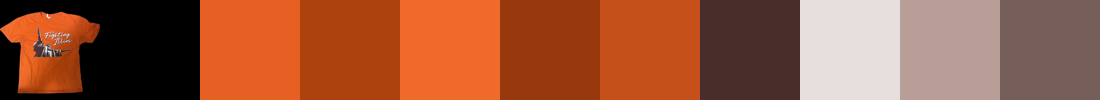

['black', 'chocolate', 'saddlebrown', 'chocolate', 'saddlebrown', 'chocolate', 'darkslategray', 'gainsboro', 'rosybrown', 'dimgray']


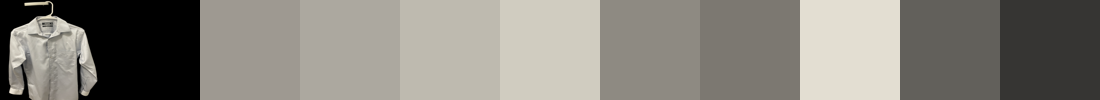

['black', 'darkgray', 'darkgray', 'silver', 'silver', 'gray', 'gray', 'gainsboro', 'dimgray', 'darkslategray']


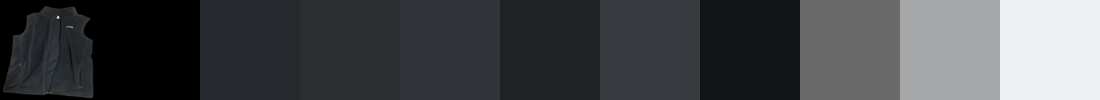

['black', 'darkslategray', 'darkslategray', 'darkslategray', 'black', 'darkslategray', 'black', 'dimgray', 'darkgray', 'whitesmoke']


In [72]:
# Loop through all images
input_path = "../data/no_background_images"
for filename in sorted(os.listdir(input_path)):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(input_path, filename)
        colors = display_color_palette(image_path)
        print(colors)
